In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kusumbasnet","key":"1ea1d2fa72cd945cf630bed6ab870b06"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

401 - Unauthorized


In [ ]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

vegetable-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
import shutil
zip_ref = zipfile.ZipFile("/content/vegetable-image-dataset.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten


In [ ]:
os.listdir('Vegetable Images')

['train', 'validation', 'test']

In [ ]:
len(os.listdir('Vegetable Images/train'))

15

In [ ]:
len(os.listdir('Vegetable Images/validation'))

15

In [ ]:
len(os.listdir('Vegetable Images/test'))

15

In [ ]:
len(os.listdir('Vegetable Images/train/Bean'))

1000

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
    'Vegetable Images/train',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 15000 images belonging to 15 classes.


In [ ]:
validation_set = train_datagen.flow_from_directory(
    'Vegetable Images/test',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 3000 images belonging to 15 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, activation = 'relu', input_shape = (64,64,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides =2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, activation = 'relu', input_shape = (64,64,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides =2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units = 124, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 15, activation = 'softmax'))

In [ ]:
cnn.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history=(cnn.fit(x=training_set, validation_data=validation_set,epochs=10))

Epoch 1/10
469/469 [==============================] - 50s 91ms/step - loss: 1.3440 - accuracy: 0.5573 - val_loss: 0.7677 - val_accuracy: 0.7520
Epoch 2/10
469/469 [==============================] - 43s 92ms/step - loss: 0.6464 - accuracy: 0.7915 - val_loss: 0.5496 - val_accuracy: 0.8257
Epoch 3/10
469/469 [==============================] - 42s 90ms/step - loss: 0.4322 - accuracy: 0.8627 - val_loss: 0.3290 - val_accuracy: 0.8900
Epoch 4/10
469/469 [==============================] - 42s 89ms/step - loss: 0.3139 - accuracy: 0.9041 - val_loss: 0.2644 - val_accuracy: 0.9133
Epoch 5/10
469/469 [==============================] - 42s 90ms/step - loss: 0.2467 - accuracy: 0.9255 - val_loss: 0.2019 - val_accuracy: 0.9377
Epoch 6/10
469/469 [==============================] - 43s 91ms/step - loss: 0.2047 - accuracy: 0.9375 - val_loss: 0.1780 - val_accuracy: 0.9477
Epoch 7/10
469/469 [==============================] - 42s 90ms/step - loss: 0.1643 - accuracy: 0.9524 - val_loss: 0.1471 - val_accuracy:

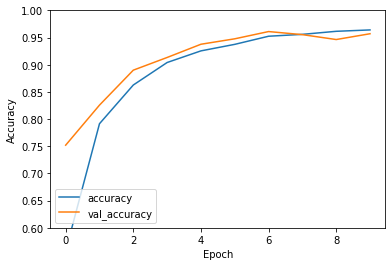

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1])
plt.legend(loc='lower left')


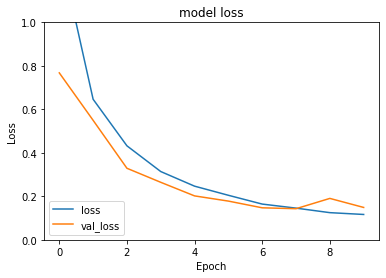

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('model loss')
plt.ylim([0, 1])
plt.legend(loc='lower left')


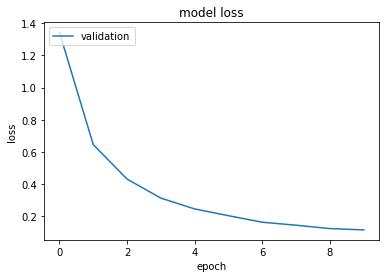

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['validation'], loc = 'upper left')
plt.show()